#Importing Data

In [ ]:
#Open JSON File and convert it into csv file
import json
import csv
import ast
 
with open("/content/drive/MyDrive/Colab Notebooks/DATA Set/retention.json") as json_file:
  jsondata = json.load(json_file)

data_file = open("/content/drive/MyDrive/Colab Notebooks/DATA Set/jsonoutput.csv", "w", newline='')
csv_writer = csv.writer(data_file)
 
count = 0
for header in jsondata:
  if count==0:
    csv_writer.writerow(jsondata[header].keys())

  csv_writer.writerow([str(e) for e in jsondata[header].values()])
  count +=1
 
data_file.close()

In [ ]:
#Read csv file and print head
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATA Set/jsonoutput.csv")

df.head()

,gender,age,gross_income,segment,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration
0,M,21 years,$ 79070.91,Individuals,0,I,0,1,0,1035
1,M,23 years,$ 178270.68,College_Graduated,0,I,0,1,0,1097
2,M,24 years,$ 31243.56,College_Graduated,0,I,1,1,0,1866
3,M,24 years,$ 130740.54,College_Graduated,0,I,0,1,0,1440
4,M,31 years,$ 112975.17,Individuals,0,I,0,0,0,376


In [ ]:
#Information related to dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54030 entries, 0 to 54029
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   gender                 54030 non-null  object
 1   age                    54030 non-null  object
 2   gross_income           54030 non-null  object
 3   segment                54030 non-null  object
 4   num_credit_cards       54030 non-null  int64 
 5   tiprel_1mes            54030 non-null  object
 6   ind_actividad_cliente  54030 non-null  int64 
 7   num_Products           54030 non-null  int64 
 8   num_loans              54030 non-null  int64 
 9   duration               54030 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 4.1+ MB


In [ ]:
#Describe Raw data
perc =[.25, .75, .90, .95]
df.describe(percentiles = perc)

,num_credit_cards,ind_actividad_cliente,num_Products,num_loans,duration
count,54030.000000,54030.000000,54030.000000,54030.000000,54030.000000
mean,0.049880,0.469073,1.536017,0.009365,2913.936665
std,0.217698,0.499047,1.578848,0.096320,2027.956268
min,0.000000,0.000000,0.000000,0.000000,366.000000
25%,0.000000,0.000000,1.000000,0.000000,1118.000000
50%,0.000000,0.000000,1.000000,0.000000,2039.500000
75%,0.000000,1.000000,2.000000,0.000000,4693.000000
90%,0.000000,1.000000,3.000000,0.000000,5844.000000
95%,0.000000,1.000000,5.000000,0.000000,6529.000000
max,1.000000,1.000000,13.000000,1.000000,7909.000000


In [ ]:
#Print all Type of values present in the column
print("Gender Types = "+str(df.gender.unique())) 
print()
print("Segment Types = "+str(df.segment.unique()))
print()
print("Customer Inactivity Flag at the beginning of the period = "+str(df.tiprel_1mes.unique()))
print()
print("Customer Inactivity Flag at the end of the period = "+str(df.ind_actividad_cliente.unique()))
print()
print("Number of credit cards issued = "+str(df.num_credit_cards.unique()))
print()
print("Number of Products = "+str(df.num_Products.unique()))
print()
print("Total number loans disbursed = "+str(df.num_loans.unique())) 

Gender Types = ['M' 'F']

Segment Types = ['Individuals' 'College_Graduated' 'VIP']

Customer Inactivity Flag at the beginning of the period = [0 1]

Customer Inactivity Flag at the end of the period = [0 1]

Number of credit cards issued = [0 1]

Number of Products = [ 1  0  4  2  7  3  5  6  9  8 10 12 11 13]

Total number loans disbursed = [0 1]


In [ ]:
#Check for null values in Data frame
df.isnull().sum(axis = 0)

gender                   0
age                      0
gross_income             0
segment                  0
num_credit_cards         0
tiprel_1mes              0
ind_actividad_cliente    0
num_Products             0
num_loans                0
duration                 0
dtype: int64

#Data Cleaning

In [ ]:
#Cleaning Age Values and income values
df['age'] = df['age'].str.replace('years','')
df['age'] = df['age'].astype(int)
df['gross_income'] = df['gross_income'].str.replace('$','')
df['gross_income'] = df['gross_income'].astype(float)
df['tiprel_1mes'] = df['tiprel_1mes'].str.replace('A','1')
df['tiprel_1mes'] = df['tiprel_1mes'].str.replace('I','0')
df['tiprel_1mes'] = df['tiprel_1mes'].astype(int)

df.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


,gender,age,gross_income,segment,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration
0,M,21,79070.91,Individuals,0,0,0,1,0,1035
1,M,23,178270.68,College_Graduated,0,0,0,1,0,1097


In [ ]:
#Filetered Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54030 entries, 0 to 54029
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 54030 non-null  object 
 1   age                    54030 non-null  int64  
 2   gross_income           54030 non-null  float64
 3   segment                54030 non-null  object 
 4   num_credit_cards       54030 non-null  int64  
 5   tiprel_1mes            54030 non-null  int64  
 6   ind_actividad_cliente  54030 non-null  int64  
 7   num_Products           54030 non-null  int64  
 8   num_loans              54030 non-null  int64  
 9   duration               54030 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 4.1+ MB


In [ ]:
#Describing FIltered data
pd.options.display.float_format = '{:.2f}'.format
perc =[.25, .75, .90, .95]
df.describe(percentiles = perc)

,age,gross_income,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration
count,54030.00,54030.00,54030.00,54030.00,54030.00,54030.00,54030.00,54030.00
mean,40.77,134196.67,0.05,0.46,0.47,1.54,0.01,2913.94
std,17.21,239721.46,0.22,0.50,0.50,1.58,0.10,2027.96
min,2.00,2336.01,0.00,0.00,0.00,0.00,0.00,366.00
25%,25.00,68581.07,0.00,0.00,0.00,1.00,0.00,1118.00
50%,40.00,101566.32,0.00,0.00,0.00,1.00,0.00,2039.50
75%,51.00,156253.76,0.00,1.00,1.00,2.00,0.00,4693.00
90%,65.00,234387.88,0.00,1.00,1.00,3.00,0.00,5844.00
95%,74.00,310033.37,0.00,1.00,1.00,5.00,0.00,6529.00
max,112.00,28894395.51,1.00,1.00,1.00,13.00,1.00,7909.00


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


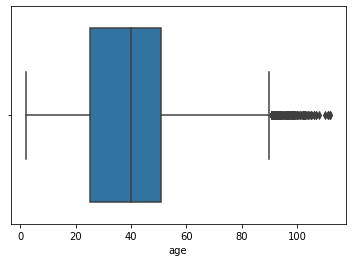

In [ ]:
#Check for extreme values
sns.boxplot(df['age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


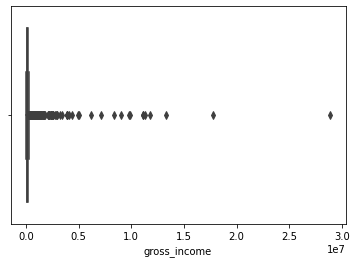

In [ ]:
sns.boxplot(df['gross_income'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


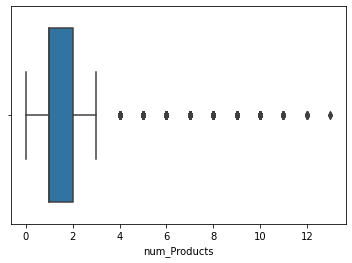

In [ ]:
sns.boxplot(df['num_Products'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


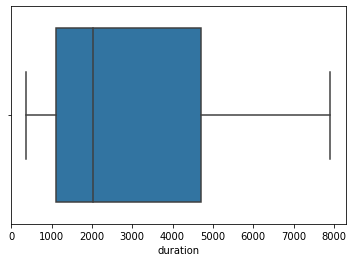

In [ ]:
sns.boxplot(df['duration'])

#Q1>For people who were inactive at the start of the study and were active by the time the study ended, is there a pattern in terms of age and gender?

In [ ]:
df_I2A = df[(df['tiprel_1mes'] == 0) & (df['ind_actividad_cliente'] == 1)]  #People who went Inactive to active
df_A2I = df[(df['tiprel_1mes'] == 1) & (df['ind_actividad_cliente'] == 0)]  #People who went active to inactive

In [ ]:
#Classify age in three category 
df_I2A['age_bins'] = pd.cut(df_I2A['age'],bins=3,labels=('young','middle_age','old'))
df_A2I['age_bins'] = pd.cut(df_A2I['age'],bins=3,labels=('young','middle_age','old'))

In [ ]:
df_gb_I2A = df_I2A.groupby(['gender','age_bins'])['tiprel_1mes'].count()
df_gb_A2I = df_A2I.groupby(['gender','age_bins'])['ind_actividad_cliente'].count()

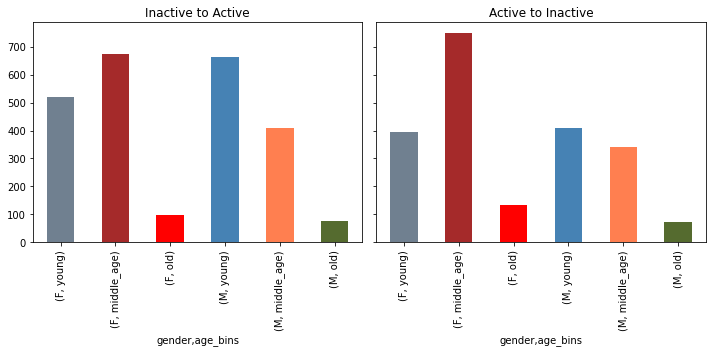

In [ ]:
#People who went Inactive to active
fig, axes = plt.subplots(1, 2, figsize=(10,5), sharey=True,sharex=False)

df_gb_I2A.plot(kind = 'bar',ax=axes[0],color=['SlateGray', 'brown','red', 'SteelBlue' ,'Coral', 'DarkOliveGreen'])
axes[0].set_title("Inactive to Active")

df_gb_A2I.plot(kind = 'bar',ax=axes[1],color=['SlateGray', 'brown','red', 'SteelBlue' ,'Coral','DarkOliveGreen'])
axes[1].set_title("Active to Inactive")

fig.tight_layout()
plt.show()

#Q2>Do people with more than average annual income tend to have relatively high activity rates compared to people with less than average annual income?

In [ ]:
col_mean = df['gross_income'].mean()
df_highSal = df[df['gross_income']>col_mean]

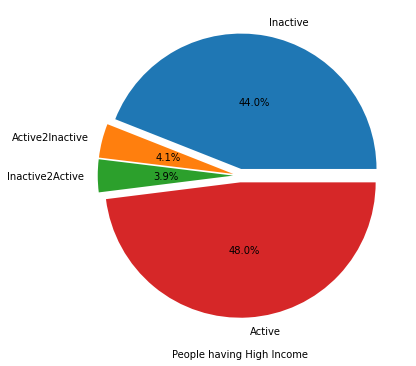

In [ ]:
fig, axes = plt.subplots(0, 1, figsize=(12,5), sharey=True,sharex=False)
df_highSal.groupby(['tiprel_1mes','ind_actividad_cliente']).size().plot.pie(labels = ['Inactive','Active2Inactive','Inactive2Active','Active'],explode=[0.05]*4 ,pctdistance=0.5, autopct="%.1f%%")
fig.tight_layout()
plt.ylabel("")
plt.xlabel("People having High Income")
plt.show()

In [ ]:
df_lowSal = df[df['gross_income']<=col_mean]

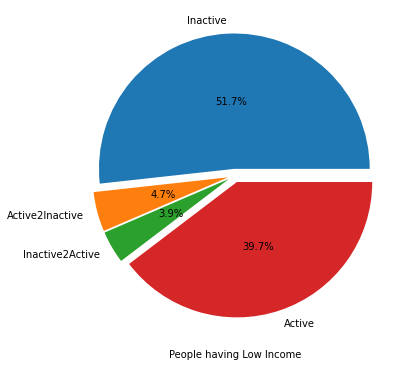

In [ ]:
fig, axes = plt.subplots(0, 1, figsize=(12,5), sharey=True,sharex=False)
df_lowSal.groupby(['tiprel_1mes','ind_actividad_cliente']).size().plot.pie(labels = ['Inactive','Active2Inactive','Inactive2Active','Active'],explode=[0.05]*4 ,pctdistance=0.5, autopct="%.1f%%")
fig.tight_layout()
plt.ylabel("")
plt.xlabel("People having Low Income")
plt.show()

In [ ]:
df_A = df[(df['tiprel_1mes'] == 1) & (df['ind_actividad_cliente'] == 1)]  #People who were Active through out the survey
df_I = df[(df['tiprel_1mes'] == 0) & (df['ind_actividad_cliente'] == 0)]  #People who were Inactive through out the survey
df_A2I = df[(df['tiprel_1mes'] == 1) & (df['ind_actividad_cliente'] == 0)]  #People who were Active then went Inactive
df_I2A = df[(df['tiprel_1mes'] == 0) & (df['ind_actividad_cliente'] == 1)]  #People who were Active then went Inactive

In [ ]:
df_A.reset_index(inplace = True)
df_I.reset_index(inplace = True)
df_A2I.reset_index(inplace = True)
df_I2A.reset_index(inplace = True)

In [ ]:
df_A['gross_income_bin'] = 1
df_I['gross_income_bin'] = 1
df_A2I['gross_income_bin'] = 1
df_I2A['gross_income_bin'] = 1

In [ ]:
col_mean = df['gross_income'].mean()

for i in range(0,len(df_A)):
  if(df_A['gross_income'][i]>col_mean):
    df_A['gross_income_bin'][i] = "high"
  else:
    df_A['gross_income_bin'][i] = "low"


In [ ]:
for i in range(0,len(df_I)):
  if(df_I['gross_income'][i]>col_mean):
    df_I['gross_income_bin'][i] = "high"
  else:
    df_I['gross_income_bin'][i] = "low"

In [ ]:
for i in range(0,len(df_A2I)):
  if(df_A2I['gross_income'][i]>col_mean):
    df_A2I['gross_income_bin'][i] = "high"
  else:
    df_A2I['gross_income_bin'][i] = "low"


In [ ]:
for i in range(0,len(df_I2A)):
  if(df_I2A['gross_income'][i]>col_mean):
    df_I2A['gross_income_bin'][i] = "high"
  else:
    df_I2A['gross_income_bin'][i] = "low"


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

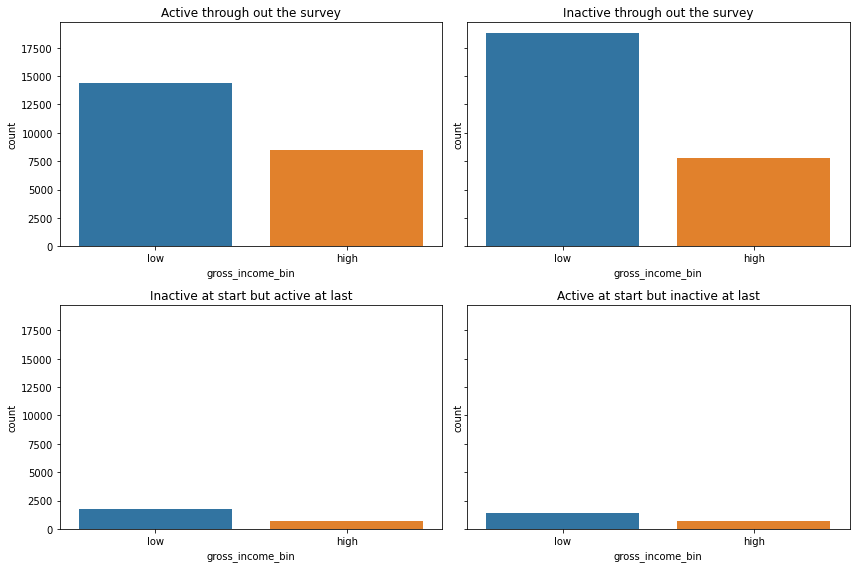

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12,8), sharey=True,sharex=False)


sns.countplot('gross_income_bin',data=df_A, ax=axes[0,0])
axes[0,0].set_title("Active through out the survey")


sns.countplot('gross_income_bin',data=df_I, ax=axes[0,1])
axes[0,1].set_title("Inactive through out the survey")

sns.countplot('gross_income_bin',data=df_I2A, ax=axes[1,0])
axes[1,0].set_title("Inactive at start but active at last")


sns.countplot('gross_income_bin',data=df_A2I, ax=axes[1,1])
axes[1,1].set_title("Active at start but inactive at last")

fig.tight_layout()
plt.show()

#Q3>What is the relationship between the number of products owned by customers who were active at the start and at the end vs those who were active at the start but were inactive at the end of the study period?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


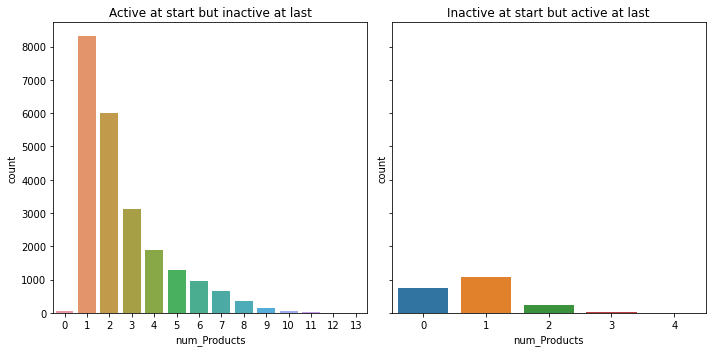

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,5), sharey=True,sharex=False)

sns.countplot('num_Products',data=df_A, ax=axes[0])
axes[0].set_title("Active at start but inactive at last")

sns.countplot('num_Products',data=df_A2I, ax=axes[1])
axes[1].set_title("Inactive at start but active at last")

fig.tight_layout()
plt.show()

#Q4>How people who display consistent behaviour (active at start and active at end, inactive at start and inactive at end) differ from people who display a change in their behaviour (active at start but inactive at the end or inactive at start but active at end)?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

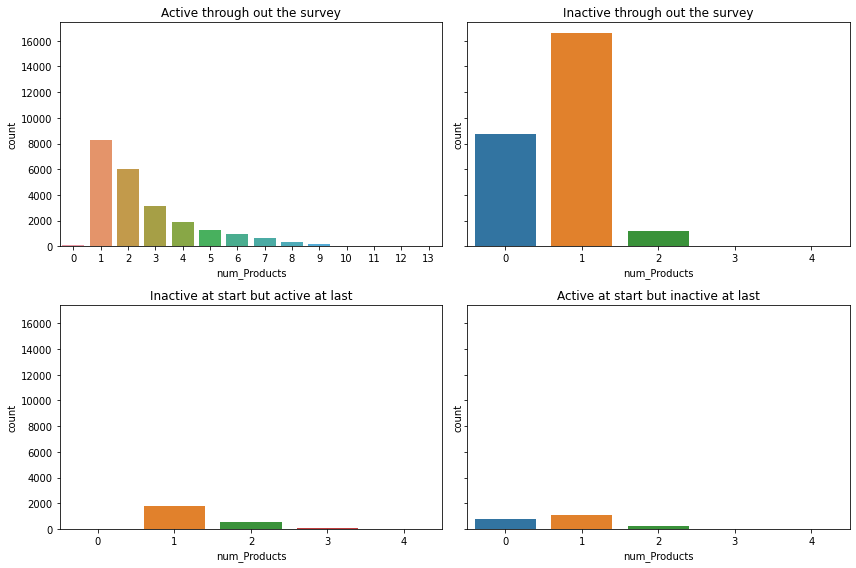

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12,8), sharey=True,sharex=False)


sns.countplot('num_Products',data=df_A, ax=axes[0,0])
axes[0,0].set_title("Active through out the survey")


sns.countplot('num_Products',data=df_I, ax=axes[0,1])
axes[0,1].set_title("Inactive through out the survey")

sns.countplot('num_Products',data=df_I2A, ax=axes[1,0])
axes[1,0].set_title("Inactive at start but active at last")


sns.countplot('num_Products',data=df_A2I, ax=axes[1,1])
axes[1,1].set_title("Active at start but inactive at last")

fig.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

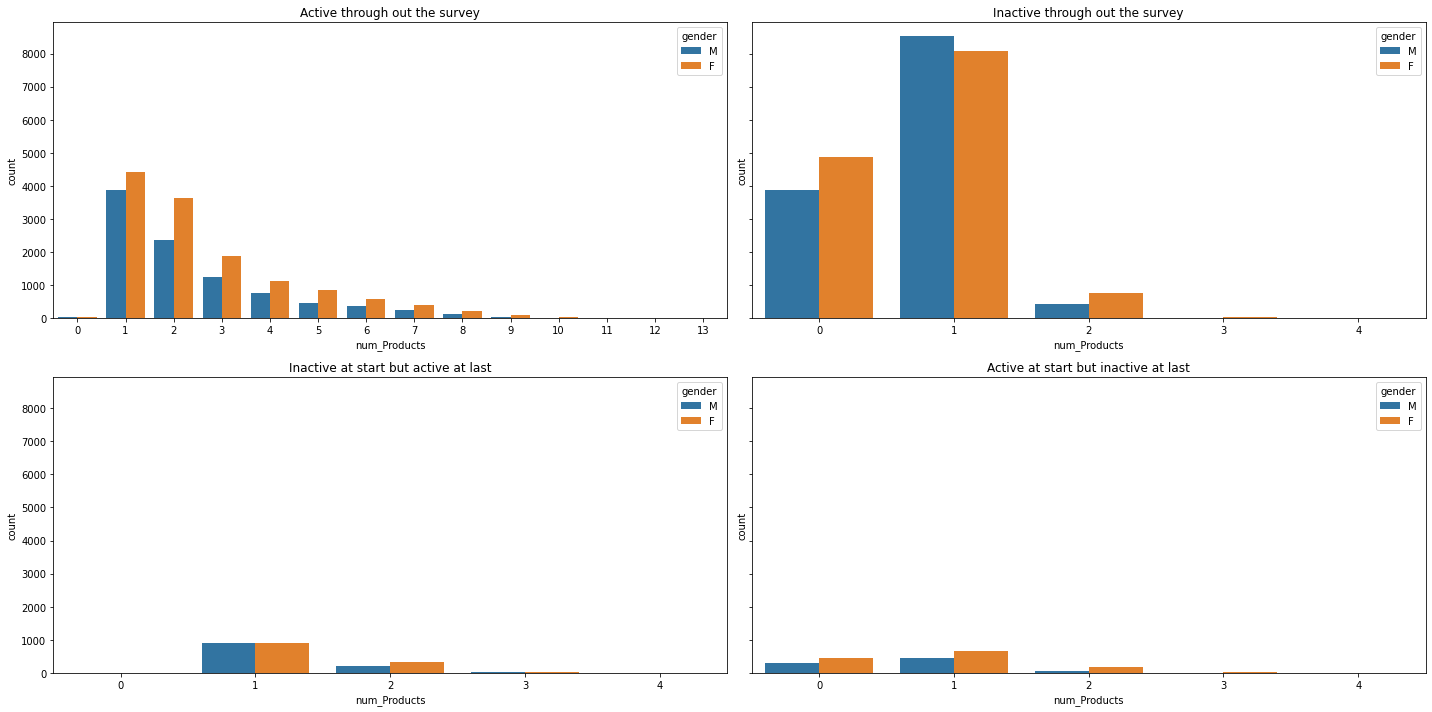

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(18,10), sharey=True,sharex=False)


sns.countplot('num_Products',hue='gender',hue_order=['M','F'],data=df_A, ax=axes[0,0])
axes[0,0].set_title("Active through out the survey")


sns.countplot('num_Products',hue='gender',hue_order=['M','F'],data=df_I, ax=axes[0,1])
axes[0,1].set_title("Inactive through out the survey")

sns.countplot('num_Products',hue='gender',hue_order=['M','F'],data=df_I2A, ax=axes[1,0])
axes[1,0].set_title("Inactive at start but active at last")


sns.countplot('num_Products',hue='gender',hue_order=['M','F'],data=df_A2I, ax=axes[1,1])
axes[1,1].set_title("Active at start but inactive at last")

fig.tight_layout()
plt.show()

#Q5>Generate elaborate profiles for the following four groups:


1.   Active at the start but inactive at the end
2.   Active at the start and active by the end
3.   Inactive at the start but active at the end
4.   Inactive at the start and inactive at the end


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

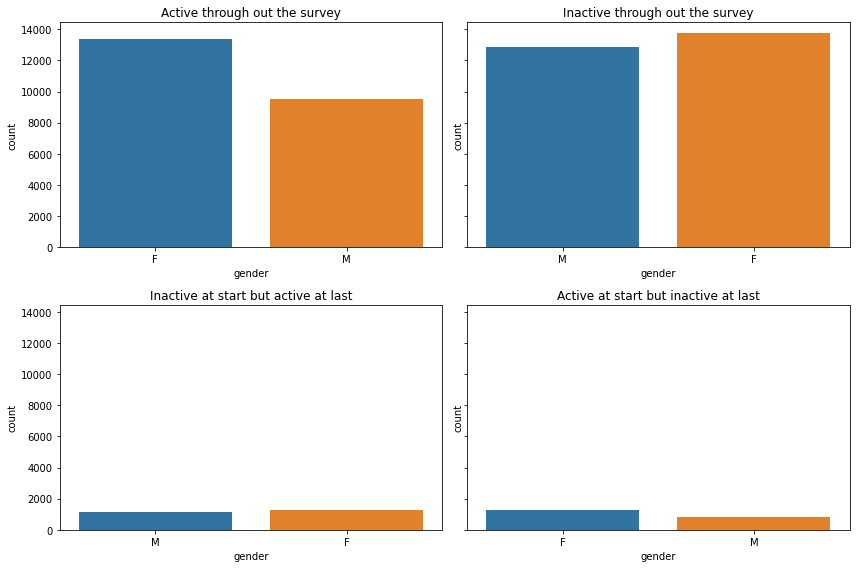

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12,8), sharey=True,sharex=False)


sns.countplot('gender',data=df_A, ax=axes[0,0])
axes[0,0].set_title("Active through out the survey")


sns.countplot('gender',data=df_I, ax=axes[0,1])
axes[0,1].set_title("Inactive through out the survey")

sns.countplot('gender',data=df_I2A, ax=axes[1,0])
axes[1,0].set_title("Inactive at start but active at last")


sns.countplot('gender',data=df_A2I, ax=axes[1,1])
axes[1,1].set_title("Active at start but inactive at last")

fig.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

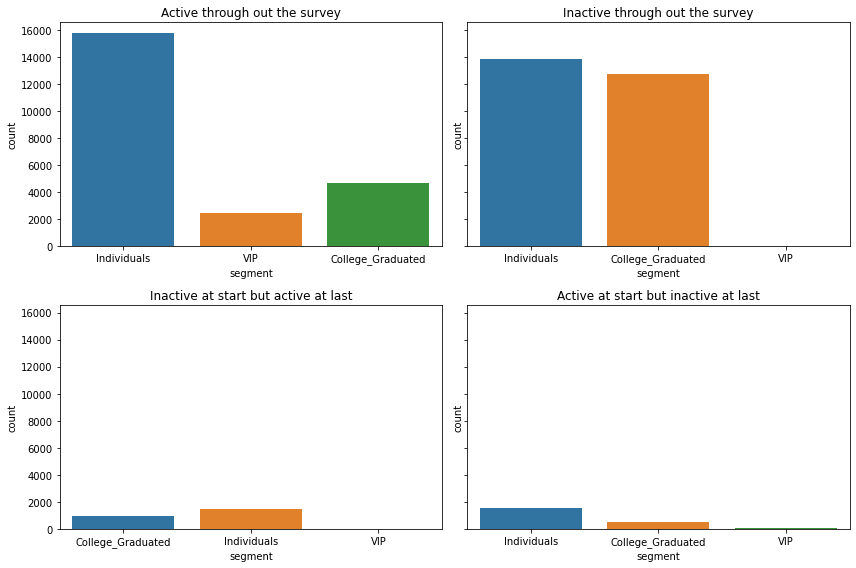

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12,8), sharey=True,sharex=False)


sns.countplot('segment',data=df_A, ax=axes[0,0])
axes[0,0].set_title("Active through out the survey")


sns.countplot('segment',data=df_I, ax=axes[0,1])
axes[0,1].set_title("Inactive through out the survey")

sns.countplot('segment',data=df_I2A, ax=axes[1,0])
axes[1,0].set_title("Inactive at start but active at last")


sns.countplot('segment',data=df_A2I, ax=axes[1,1])
axes[1,1].set_title("Active at start but inactive at last")

fig.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

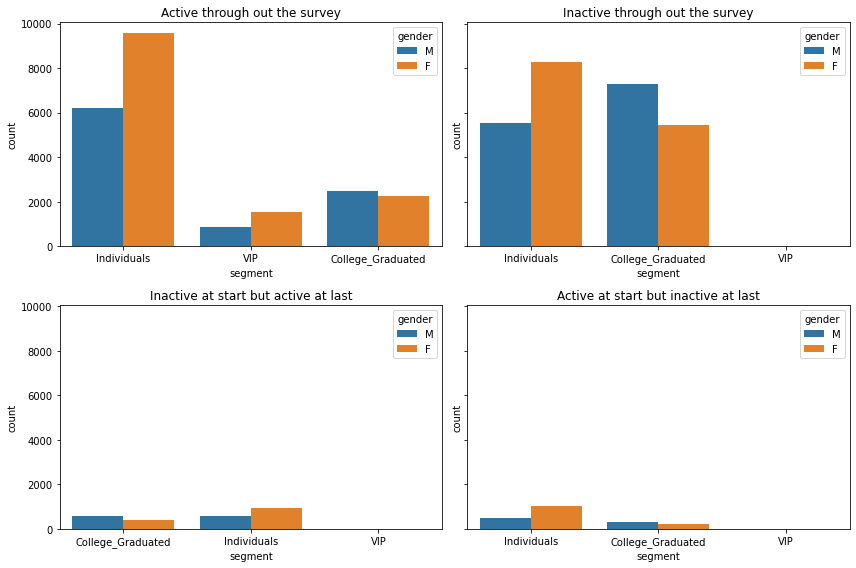

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12,8), sharey=True,sharex=False)


sns.countplot('segment',hue='gender',hue_order=['M','F'],data=df_A, ax=axes[0,0])
axes[0,0].set_title("Active through out the survey")


sns.countplot('segment',hue='gender',hue_order=['M','F'],data=df_I, ax=axes[0,1])
axes[0,1].set_title("Inactive through out the survey")

sns.countplot('segment',hue='gender',hue_order=['M','F'],data=df_I2A, ax=axes[1,0])
axes[1,0].set_title("Inactive at start but active at last")


sns.countplot('segment',hue='gender',hue_order=['M','F'],data=df_A2I, ax=axes[1,1])
axes[1,1].set_title("Active at start but inactive at last")

fig.tight_layout()
plt.show()